In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from datetime import datetime, date

import pickle

In [2]:
twitter_file_path = "../../data/ego-twitter.p"
github_file_path = "../../data/github_users.p"

with open(twitter_file_path, 'rb') as f:
    T = pickle.load(f)

with open(github_file_path, 'rb') as f:
    Gh = pickle.load(f)

## Basic drawing of a network using NetworkX (Fixed)

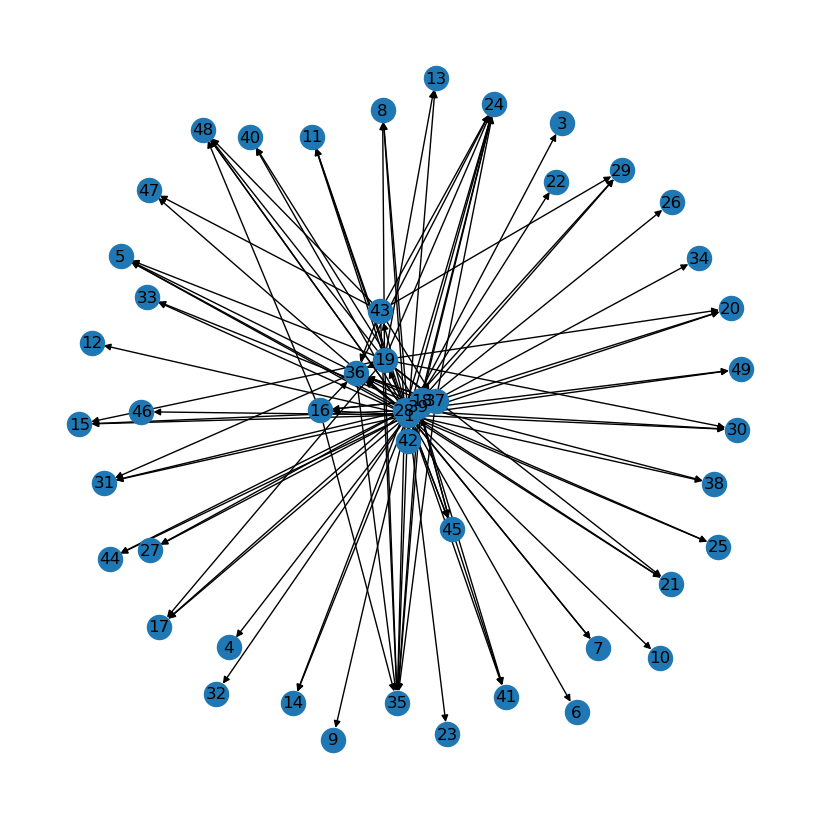

In [3]:
T_sub = nx.DiGraph()
edges_f_t = [x for x in T.edges(list(range(50)), data=True) if x[0] in [1, 16, 18, 19, 28, 36, 37, 39, 42, 43, 45] if x[1] < 50]
T_sub.add_edges_from(edges_f_t)

plt.figure(figsize=(8, 8))
nx.draw(T_sub, with_labels=True)
plt.show()

## Queries on a graph (Fixed)

In [4]:
# Use a list comprehension to get the nodes of interest: noi
noi = [n for n, d in T.nodes(data=True) if d['occupation'] == 'scientist']

# Use a list comprehension to get the edges of interest: eoi
eoi = [(u, v) for u, v, d in T.edges(data=True) if d['date'] < date(2010, 1, 1)]

print(noi[:10])
print(eoi[:10])

[5, 9, 13, 15, 17, 19, 20, 22, 23, 27]
[(1, 5), (1, 9), (1, 13), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 24), (1, 27)]


## Specifying a weight on edges (Fixed)

In [5]:
# Set the weight of the edge
T.edges[1, 10]['weight'] = 2

# Iterate over all the edges (with metadata)
for u, v, d in T.edges(data=True):

    # Check if node 293 is involved
    if 293 in [u, v]:

        # Set the weight to 1.1
        d['weight'] = 1.1

## Checking whether there are self-loops in the graph

In [6]:
# Define find_selfloop_nodes()
def find_selfloop_nodes(G):
    """
    Finds all nodes that have self-loops in the graph G.
    """
    nodes_in_selfloops = []

    # Iterate over all the edges of G
    for u, v in G.edges(data=False):

    # Check if node u and node v are the same
        if u == v:

            # Append node u to nodes_in_selfloops
            nodes_in_selfloops.append(v)

    return nodes_in_selfloops

# Check whether number of self loops equals the number of nodes in self loops
assert nx.number_of_selfloops(T) == len(find_selfloop_nodes(T))

## Visualizing using Matrix plots

/opt/conda/lib/python3.11/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


<Axes: >

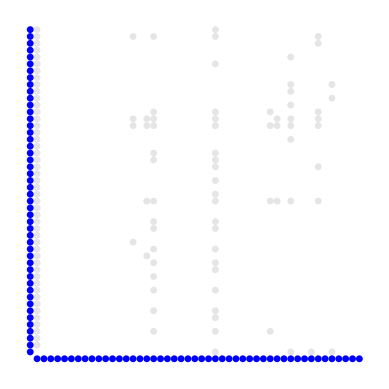

In [7]:
# Import nxviz
from nxviz import matrix

T_sub = nx.DiGraph()
edges_f_t = [x for x in T.edges(list(range(50)), data=True) if x[0] in [1, 16, 18, 19, 28, 36, 37, 39, 42, 43, 45] if x[1] < 50]
T_sub.add_edges_from(edges_f_t)

# Create the matrix plot: m
m = matrix(T_sub)
m

In [8]:
# Display the plot
plt.show()

# Convert T to a matrix format: A
A = nx.to_numpy_matrix(T)

# Convert A back to the NetworkX form as a directed graph: T_conv
T_conv = nx.from_numpy_matrix(A, create_using=nx.DiGraph())

# Check that the `category` metadata field is lost from each node
for n, d in T_conv.nodes(data=True):
    assert 'category' not in d.keys()

AttributeError: module 'networkx' has no attribute 'to_numpy_matrix'

## Visualizing using Circos plots

In [ ]:
# Import necessary modules
import matplotlib.pyplot as plt
from nxviz import circos

# Create the circos plot: c
c = circos(T)

# Display the plot
plt.show()